###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Text Mining & Image Recognition
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 1

#### Cargar Librerias

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Problema 1

In [20]:
def CanalColor(imagen,color):

    ''' Funcion la cual recibe dos parametros, una imagen y un entero llamado color, la
        funcion devuelve una imagen la cual tiene activos los canales de color segun lo siguiente:
        
            Si el parametro color vale 1, la imagen muestra activos unicamente el color azul.
            Si el parametro color vale 2, la imagen muestra activos unicamente el color verde.
            Si el parametro color vale 3, la imagen muestra activos unicamente el color rojo.
            Si el parametro color vale 10, la imagen muestra activos unicamente los colores rojo y verde.
            Si el parametro color vale 20, la imagen muestra activos unicamente los colores verde y azul.
            Si el parametro color vale 30, la imagen muestra activos unicamente los colores azul y rojo.
    '''
    
    if (color== 1 or color== 2 or color== 3 or color== 10 or color== 20 or color== 30):
        # Cargar la imagen
        img= cv2.imread(imagen) 
        # Dimension de imagen
        alto=  img.shape[0]
        ancho= img.shape[1]
        # Espacio para la imagen resultante
        monocromo=np.zeros((alto,ancho,3))

        for i in range(0,alto):
            for j in range (0,ancho):

                pixel=img[i,j]

                # Extraemos canales, colores RGB
                red=pixel[2]
                green=pixel[1]
                blue=pixel[0]

                if color==1:

                    # Dejar unicamente Azul. Anular Rojo y Azul
                    monocromo[i,j]=[blue,0,0]
        
                elif color==2:

                    # Dejar unicamente Verde. Anular Rojo y Azul
                    monocromo[i,j]=[0,green,0]

                elif color==3:
            
                    # Dejar unicamente Rojo. Anular Verde y Azul
                    monocromo[i,j]=[0,0,red]

                elif color==10:

                    # Dejar unicamente Rojo y verde. Anular Azul
                    monocromo[i,j]=[0,green,red]

                elif color==20:
            
                    # Dejar unicamente Azul y verde. Anular Rojo
                    monocromo[i,j]=[blue,green,0]
        
                else:

                    # Dejar unicamente Azul y Rojo. Anular Verde
                    monocromo[i,j]=[blue,0,red]



        # Volverla Imagen
        cv2.imwrite("monocromo.jpg",monocromo) 
        # Cargar la imagen
        monocromo= cv2.imread("monocromo.jpg")
        # Ver la imagen
        plt.imshow(cv2.cvtColor(monocromo,cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("El valor de color ingresado es inválido,debe ser: 1,2,3,10,20 ó 30, esta es la imagen original:")
        # Cargar la imagen
        imagen= cv2.imread("AntiguaGuatemala.jpg") 
        # Convertir la imagen de BGR a RGB
        imagen= cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
        # Ver la imagen
        plt.imshow(imagen)
        plt.show()

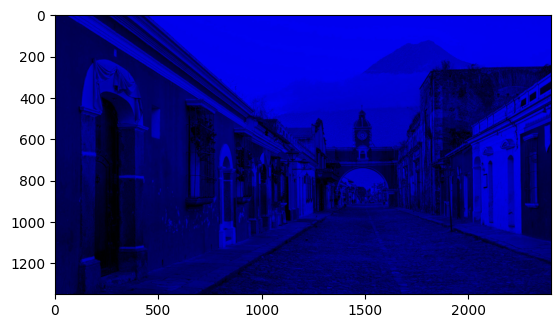

In [21]:
# Azul
CanalColor("AntiguaGuatemala.jpg",1)

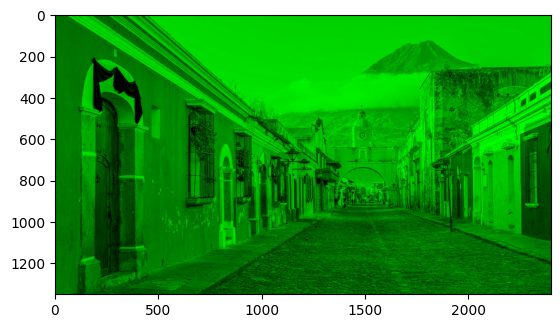

In [22]:
# Verde
CanalColor("AntiguaGuatemala.jpg",2)

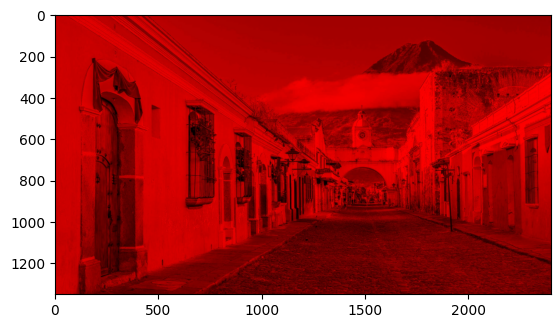

In [23]:
# Rojo
CanalColor("AntiguaGuatemala.jpg",3)

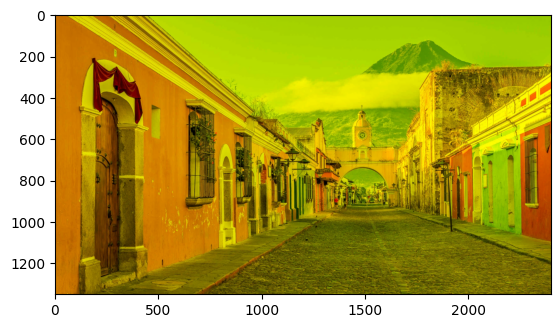

In [10]:
# Rojo y Verde
CanalColor("AntiguaGuatemala.jpg",10)

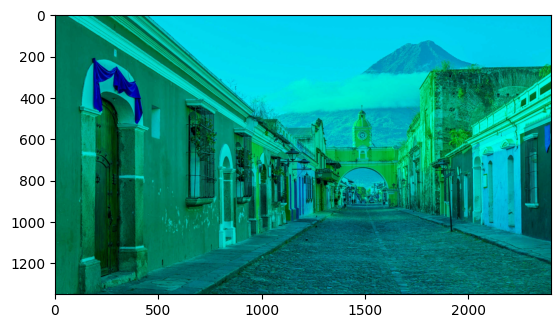

In [11]:
# Verde y Azul
CanalColor("AntiguaGuatemala.jpg",20)

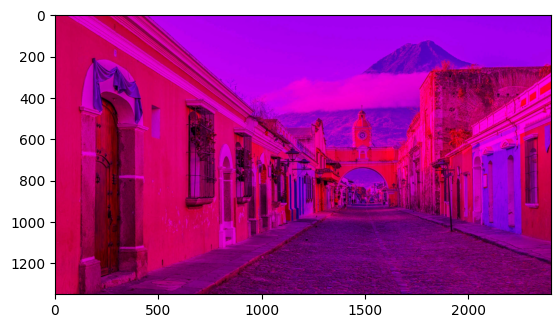

In [12]:
# Azul y Rojo
CanalColor("AntiguaGuatemala.jpg",30)

El valor de color ingresado es inválido,debe ser: 1,2,3,10,20 ó 30, esta es la imagen original:


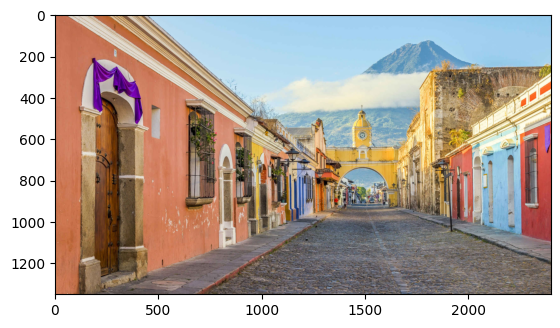

In [13]:
# Otro Valor
CanalColor("AntiguaGuatemala.jpg",5)

#### Problema 2

In [25]:
def ConstruccionImagen (gray_red,gray_green,gray_blue):

    ''' Funcion que recibe  3 imagenes en escala de grises en 3D
        Y construye la imagen original a color, a partir de las 3 entradas
    '''

    # Cargar Imagenes
    img_gray_red= cv2.imread(gray_red)
    img_gray_green=cv2.imread(gray_green)
    img_gray_blue=cv2.imread(gray_blue)

    # Dimension Imagen
    alto= img_gray_red.shape[0]
    ancho=img_gray_red.shape[1]

    # Espacio para la imagen
    colores=np.zeros((alto,ancho,3))

    for i in range(0,alto):
        for j in range(0,ancho):

            pixel_red=img_gray_red[i,j,2]
            pixel_green=img_gray_green[i,j,1]
            pixel_blue=img_gray_blue[i,j,0]

            colores[i,j]=[pixel_blue,pixel_green,pixel_red] 

    # Volver imagen
    cv2.imwrite("imagen_color.jpg",colores)
    # Cargar Imagen
    colores=cv2.imread("imagen_color.jpg")


    # Ver imagen
    plt.imshow(cv2.cvtColor(colores,cv2.COLOR_BGR2RGB))
    plt.show()
    

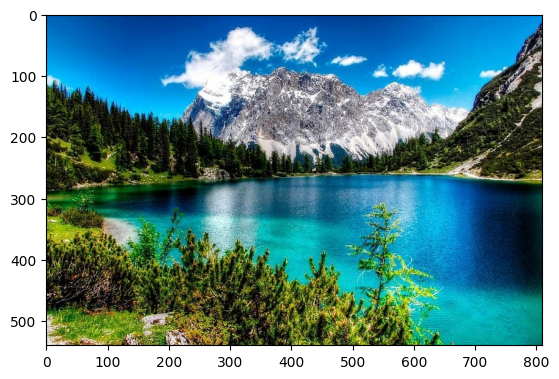

In [34]:
ConstruccionImagen("imagen1_salida_gray_rojo.jpg","imagen1_salida_gray_verde.jpg","imagen1_salida_gray_azul.jpg")

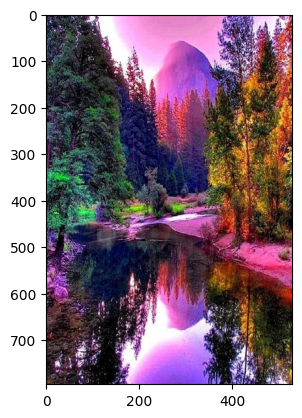

In [27]:
ConstruccionImagen("imagen2_salida_gray_rojo.jpg","imagen2_salida_gray_verde.jpg","imagen2_salida_gray_azul.jpg")

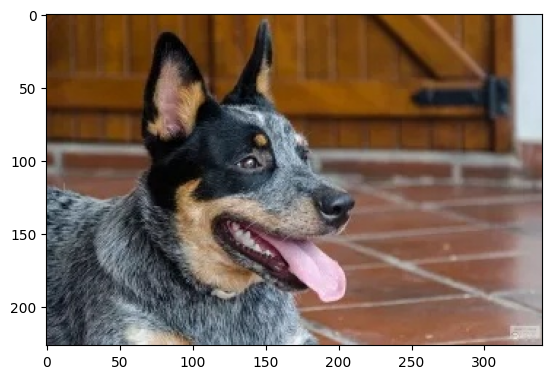

In [28]:
ConstruccionImagen("perro_salida_gray_rojo.jpg","perro_salida_gray_verde.jpg","perro_salida_gray_azul.jpg")

#### Problema 3

In [31]:
def EscalaGrises3D(imagen):

    ''' Función que recibe una imagen a color
        La separa en 3 imagenes a escala de grises en 3D
    '''
    # Cargar imagen
    img=cv2.imread(imagen)
    
    # Dimension Imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    # Espacio para imagen resultante
    gray_red=np.zeros((alto,ancho,1))
    gray_green=np.zeros((alto,ancho,1))
    gray_blue=np.zeros((alto,ancho,1))

    # Obtener Pixeles
    for i in range(0,alto):
        for j in range(0,ancho):

            pixel=img[i,j]

            # Extraer canales
            red=pixel[2]
            green=pixel[1]
            blue=pixel[0]

            # Generar nuevos pixelex
            gray_red[i,j]=red
            gray_green[i,j]=green
            gray_blue[i,j]=blue
    
    # Volverla Imagen
    cv2.imwrite("ejercicio_salida_gray_red.jpg",gray_red) 
    cv2.imwrite("ejercicio_salida_gray_green.jpg",gray_green)
    cv2.imwrite("ejercicio_salida_gray_blue.jpg",gray_blue)
    # Cargar la imagen
    gray_red= cv2.imread("ejercicio_salida_gray_red.jpg")
    gray_green= cv2.imread("ejercicio_salida_gray_green.jpg")
    gray_blue= cv2.imread("ejercicio_salida_gray_blue.jpg")

    # Ver la imagen
    plt.imshow(cv2.cvtColor(gray_red,cv2.COLOR_BGR2RGB))
    plt.show() 
    plt.imshow(cv2.cvtColor(gray_green,cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(gray_blue,cv2.COLOR_BGR2RGB))
    plt.show() 

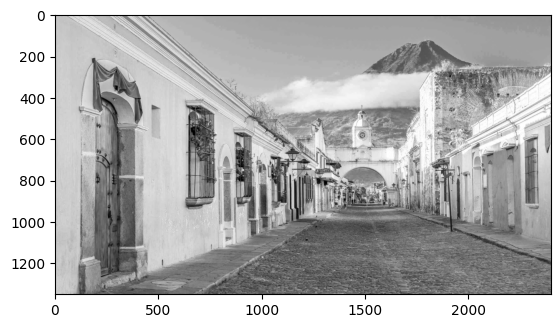

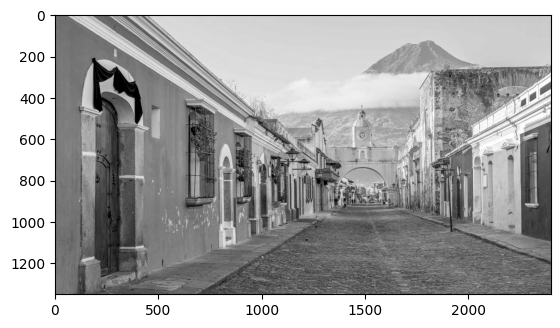

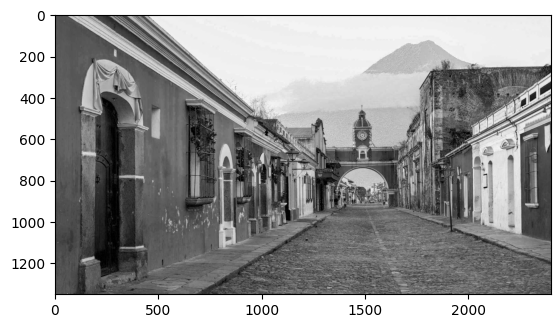

In [32]:
EscalaGrises3D("AntiguaGuatemala.jpg")

#### Problema 4

In [61]:
def HistogramaCanal(imagen):

    #Cargar Imagen
    img=cv2.imread(imagen)
    # Dimension Imagen
    alto=img.shape[0]
    ancho=img.shape[1]
    # Espacio de imagen
    img_red=np.zeros((alto,ancho,3))
    img_green=np.zeros((alto,ancho,3))
    img_blue=np.zeros((alto,ancho,3))
    img_gray=np.zeros((alto,ancho,1))

    #Obtener pixel

    for i in range(0,alto):
        for j in range(0,ancho):
            
            pixel=img[i,j]

            #Extraer canales
            red=pixel[2]
            green=pixel[1]
            blue=pixel[0]
            
            # Generar imagenes
            img_red[i,j]=[0,0,red]
            img_green[i,j]=[0,green,0]
            img_blue[i,j]=[blue,0,0]
            img_gray[i,j]=int(0.29*red +0.59*green + 0.114*blue)

    # Calcular medias
    red_mean=np.mean(img_red)
    green_mean=np.mean(img_green)
    blue_mean=np.mean(img_blue)
    gray_mean=np.mean(img_gray)
    # Volverla Imagen
    cv2.imwrite("imagen_red.jpg",img_red) 
    cv2.imwrite("imagen_green.jpg",img_green) 
    cv2.imwrite("imagen_blue.jpg",img_blue) 
    cv2.imwrite("imagen_gray.jpg",img_gray) 
    #Cargar la imagen
    img_red= cv2.imread("imagen_red.jpg")
    img_green= cv2.imread("imagen_green.jpg")
    img_blue= cv2.imread("imagen_blue.jpg")
    img_gray= cv2.imread("imagen_gray.jpg",cv2.IMREAD_GRAYSCALE)
    # Calcular Histogramas
    red_hist=cv2.calcHist([img_red],[0],None,[256],[0,256])
    green_hist=cv2.calcHist([img_green],[0],None,[256],[0,256])
    blue_hist=cv2.calcHist([img_blue],[0],None,[256],[0,256])
    gray_hist=cv2.calcHist([img_gray],[0],None,[256],[0,256])

    # Hacer Historgramas:

    plt.figure(figsize=(12,8))

    ## Histograma canal rojo
    plt.subplot(2,2,1)
    plt.plot(red_hist,color="red")
    plt.axvline(red_mean, color='black', linestyle='dashed')
    plt.xlabel("Intesidad de Pixeles")
    plt.ylabel("Pixeles Totales")
    plt.title("Histograma de Canal Rojo")
    

    
    ## Histograma canal verde
    plt.subplot(2,2,2)
    plt.plot(green_hist,color="green")
    plt.axvline(green_mean, color='black', linestyle='dashed')
    plt.xlabel("Intesidad de Pixeles")
    plt.ylabel("Pixeles Totales")
    plt.title("Histograma de Canal Verde")
    

    ## Histograma canal verde
    plt.subplot(2,2,3)
    plt.plot(blue_hist,color="blue")
    plt.axvline(blue_mean, color='black', linestyle='dashed')
    plt.xlabel("Intesidad de Pixeles")
    plt.ylabel("Pixeles Totales")
    plt.title("Histograma de Canal Azul")
    

    ## Histograma canal verde
    plt.subplot(2,2,4)
    plt.plot(gray_hist,color="black")
    plt.axvline(gray_mean, color='black', linestyle='dashed')
    plt.xlabel("Intesidad de Pixeles")
    plt.ylabel("Pixeles Totales")
    plt.title("Histograma de Canal Gris")

    plt.tight_layout()
    plt.show()

            

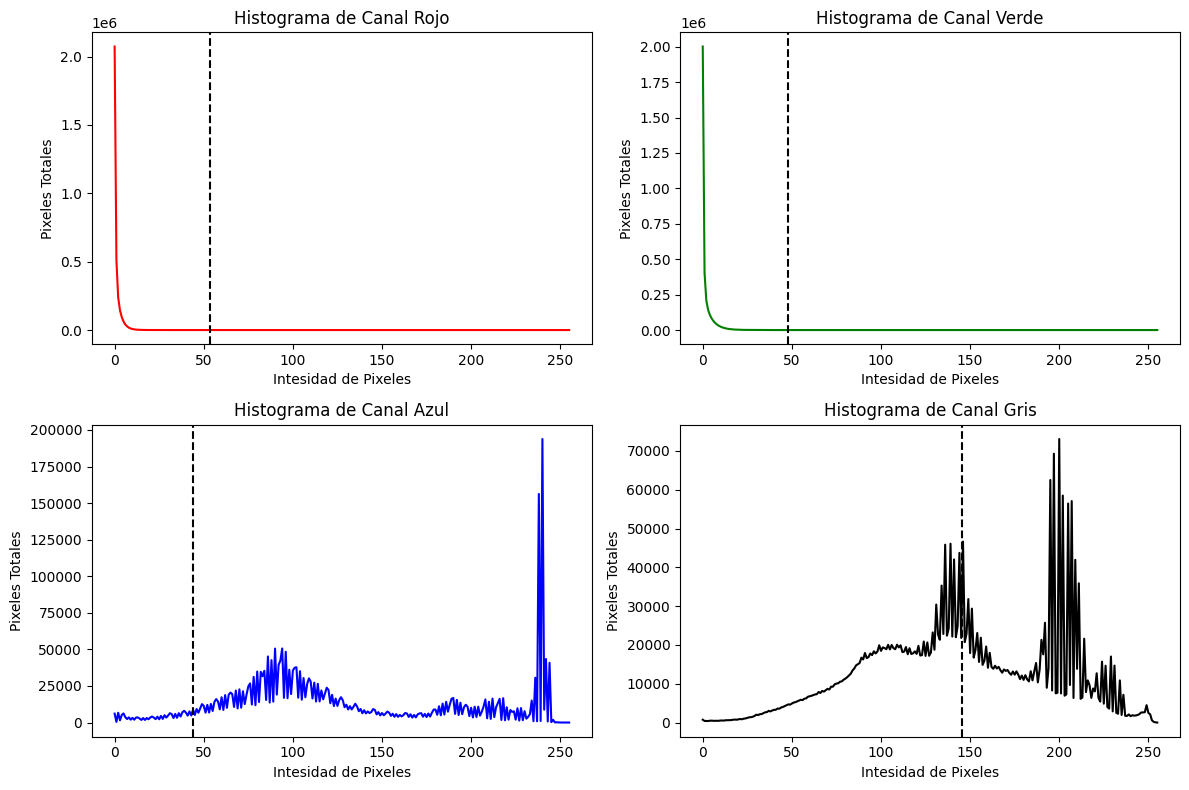

In [62]:
HistogramaCanal("AntiguaGuatemala.jpg")

#### Problema 5

El espacio de color HSV (tono, saturación y valor) es un modelo de representación de colores que se utiliza comúnmente en aplicaciones gráficas y de procesamiento de imágenes. A diferencia del espacio de color RGB (rojo, verde y azul), que representa los colores como mezclas de intensidades de luz en cada canal, el espacio HSV describe los colores de una manera más intuitiva y perceptual.

Los tres componentes del espacio de color HSV son:

Tono (H): Representa el tipo de color y se expresa en grados (0° a 360°). El círculo cromático se divide en 360 grados, y cada ángulo representa un color específico. Por ejemplo, los valores cercanos a 0° y 360° corresponden al rojo, mientras que los valores cercanos a 120° se asocian con el verde y los valores cercanos a 240° con el azul.

Saturación (S): Indica la intensidad o pureza del color. Valores bajos de saturación se acercan al gris o al blanco, mientras que valores altos corresponden a colores más intensos. La saturación se expresa como un porcentaje, generalmente en el rango de 0% a 100%.

Valor (V): Representa la luminosidad o brillo del color. Valores cercanos a 0% son negros, mientras que valores cercanos al 100% son colores más brillantes y claros.

Para mapear colores al espacio de color HSV, primero se necesitan los valores RGB del color que se quiere representar. Luego, estos valores se convierten a valores HSV mediante un proceso de conversión matemática.

El proceso de conversión puede variar dependiendo del rango de valores y la escala utilizada en la implementación, pero a grandes rasgos, el algoritmo puede seguir los siguientes pasos:

Normalización de los valores RGB: Asegurarse de que los valores estén en el rango correcto (0 a 255 o 0.0 a 1.0) según la escala utilizada.

Cálculo del valor máximo (V): Se obtiene tomando el máximo de los componentes RGB normalizados.

Cálculo de la saturación (S): Se calcula dividiendo la diferencia entre el valor máximo y el valor mínimo de los componentes RGB normalizados entre el valor máximo.

Cálculo del tono (H): Depende de los valores individuales de R, G y B. Se pueden usar fórmulas trigonométricas para determinar el ángulo en grados que corresponde al tono.

Una vez que los valores H, S y V se han calculado, se tiene la representación del color en el espacio HSV. Este espacio es útil en aplicaciones donde se desea manipular y trabajar con colores de una manera más intuitiva, como ajustar la saturación, cambiar el brillo o realizar operaciones de selección de colores basadas en rangos específicos.



